# Requisitos Obligatorios

- Modelos Scikit-learn: Usa al menos estos modelos (sí, en serio). Regresión Lineal, Regresión Logística, Árboles de Decisión, Random Forest, Gradient Boosting, SVM, k-NN, Naive Bayes, k-Means, PCA. Prueba múltiples modelos por problema y documenta cuál fue el mejor.
- Entrena, prueba y valida cada modelo (imagina que el jefe te está mirando).
- Genera visualizaciones que se vean bien y entreguen insights 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
df_bank = pd.read_csv('datos/bank.csv',sep=';')
df_bankfull = pd.read_csv('datos/bank-full.csv', sep=';')

In [20]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
# Algoritmo de regresion logistica.
# Necesitamos segun la convertir las columnas a valores binarios, lo cual algunos ya lo son.
df_bank['default']=df_bank['default'].replace({'yes': 1, 'no':0})
df_bank['loan']=df_bank['loan'].replace({'yes': 1, 'no':0})
df_bank['housing']=df_bank['housing'].replace({'yes': 1, 'no':0})
df_bank['y']=df_bank['y'].replace({'yes': 1, 'no':0})
# Esto lo hacemos para mejor implementacion del modelo.

/tmp/ipykernel_5566/1065673040.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank['default']=df_bank['default'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_5566/1065673040.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank['loan']=df_bank['loan'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_5566/1065673040.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [22]:
# Algoritmo de regresion logistica.
# Necesitamos segun la convertir las columnas a valores binarios, lo cual algunos ya lo son.
df_bankfull['default']=df_bankfull['default'].replace({'yes': 1, 'no':0})
df_bankfull['loan']=df_bankfull['loan'].replace({'yes': 1, 'no':0})
df_bankfull['housing']=df_bankfull['housing'].replace({'yes': 1, 'no':0})
df_bankfull['y']=df_bankfull['y'].replace({'yes': 1, 'no':0})
# Esto lo hacemos para mejor implementacion del modelo.

/tmp/ipykernel_5566/2987865632.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bankfull['default']=df_bankfull['default'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_5566/2987865632.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bankfull['loan']=df_bankfull['loan'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_5566/2987865632.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-

In [23]:
df_modelo = df_bankfull.copy()
# Separar características (X) y variable objetivo (y)
X = df_modelo.drop(columns=["y"])
y = df_modelo["y"]

In [24]:
# Identificar columnas categóricas y numéricas
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

In [25]:
# Codificar variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical = encoder.fit_transform(X[categorical_features])
X_categorical_df = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_features))

In [26]:
# Normalizar variables numéricas
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_features])
X_numerical_df = pd.DataFrame(X_numerical, columns=numerical_features)

In [27]:
# Combinar datos procesados
X_processed = pd.concat([X_numerical_df, X_categorical_df], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [29]:
# Inicializar y entrenar modelos
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Generar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Evaluar modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Exactitud de Regresión Logística: {accuracy_log_reg:.4f}")
print(f"Exactitud de Random Forest: {accuracy_rf:.4f}")

Exactitud de Regresión Logística: 0.8989
Exactitud de Random Forest: 0.9046


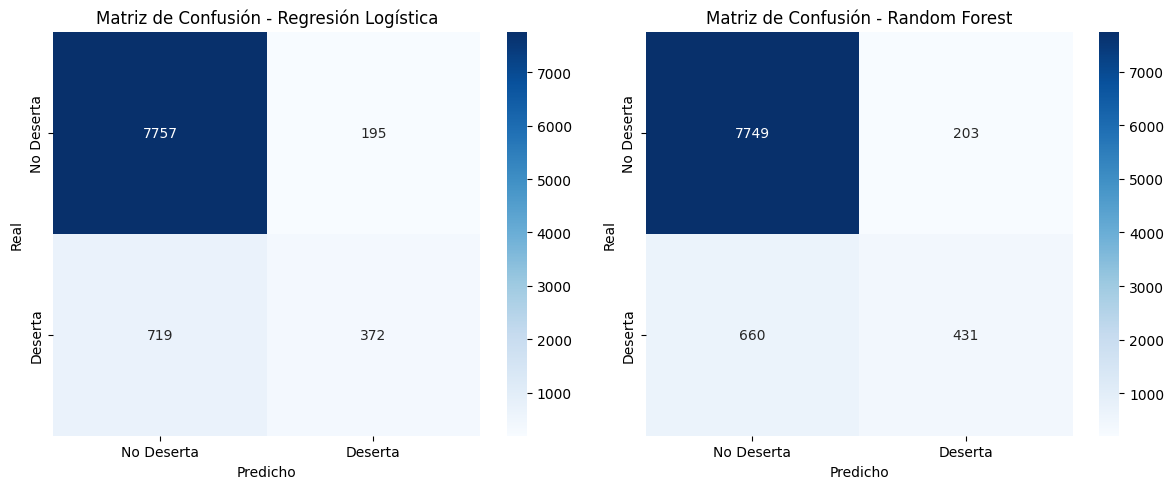

In [31]:

from sklearn.metrics import confusion_matrix

# Crear matriz de confusión para cada modelo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

models = {"Regresión Logística": y_pred_log_reg, "Random Forest": y_pred_rf}

for ax, (model_name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Deserta", "Deserta"],
                yticklabels=["No Deserta", "Deserta"], ax=ax)
    ax.set_title(f"Matriz de Confusión - {model_name}")
    ax.set_xlabel("Predicho")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()


Regresión Logística tiene una exactitud de 0.9017 (90.17%), lo que significa que aproximadamente el 90.17% de los clientes fueron clasificados correctamente como desertores o no desertores.  
Random Forest tiene una exactitud de 0.9006 (90.06%), es decir, su precisión es 90.06%.  
🔍 ¿Cómo interpretar estos números?
Ambos modelos tienen un desempeño muy similar (diferencia de solo 0.11%).
La Regresión Logística tuvo una ligeramente mejor precisión que el Random Forest en este caso.
Esto con la version pequeña del dataset:
- ![imagen1](imagenes/imagen1.png)

Veamos como se comporto con un volumen de datos mayor:  

Comparación de Modelos:
Regresión Logística:

Verdaderos Negativos (No Deserta): 7757
- Falsos Positivos: 195
- Falsos Negativos: 719
- Verdaderos Positivos (Deserta): 372

Random Forest:

Verdaderos Negativos (No Deserta): 7749
- Falsos Positivos: 203
- Falsos Negativos: 660
- Verdaderos Positivos (Deserta): 431


Observaciones clave:


Ambos modelos muestran un comportamiento similar en general.  
- Random Forest tiene un mejor rendimiento en detectar casos positivos (deserción) con 431 vs 372 de la Regresión Logística
- La Regresión Logística tiene ligeramente menos falsos positivos (195 vs 203)
- Random Forest tiene menos falsos negativos (660 vs 719)

- ![imagen2](imagenes/imagen2.png)
